# Data understanding
In diesem Notebook werden die Daten der [Strassennamen](https://data.bs.ch/explore/dataset/100189/information/) des Kanton Basel-Stadt explorativ begutachtet.

---
## Laden der Daten

In [1]:
url = 'https://data.bs.ch/explore/dataset/100189/download/?format=csv&timezone=Europe/Zurich&lang=de&use_labels_for_header=true&csv_separator=%3B '

Daten in ein pandas-Dataframe abfüllen um eine tabelarische Übersicht über die Daten zu erhalten.
Sollte pandas nicht installiert sein `pip install pandas`

In [2]:
import pandas as pd

df = pd.read_csv(url, sep=';')
df.head()

,Id Strasse,Strassenname,Erklärung erste Zeile,Erklärung zweite Zeile,Geo Shape,Geo Point,Erstmals erwähnt,Amtlich benannt,Indextext,Kurztext
0,1267,Unterm Schellenberg,NaN,NaN,"{""coordinates"": [[[7.646100416914682, 47.57103...","47.57438530908011,7.647476787299508",NaN,NaN,SCH,Unterm Schellenberg
1,1311,Wendelinsgasse,NaN,NaN,"{""coordinates"": [[[7.652143633582508, 47.58464...","47.585508929842106,7.652674199435162",NaN,NaN,WEN,Wendelinsgasse
2,1197,Keltenweg,NaN,NaN,"{""coordinates"": [[[7.638296801699711, 47.57292...","47.57320240950238,7.635561106232719",NaN,NaN,KEL,Keltenweg
3,1095,Artelweg,NaN,NaN,"{""coordinates"": [[[7.664556024301177, 47.57864...","47.578660346190595,7.662622581792329",NaN,NaN,ART,Artelweg
4,1098,Auhaldenweg,NaN,NaN,"{""coordinates"": [[[7.664022858336189, 47.58385...","47.58413931663541,7.66205361334022",NaN,NaN,AUH,Auhaldenweg


---
## Daten begutachten

Prüfen auf Null-Values. Neben `Strassenname` sind vor allem die Spalten `Erklärung erste Zeile` und `Erklärung zweite Zeile` interessant. Diese enthalten die Beschreibungen zu der Strasse und oft auch einen Hinweis nach welchem Objekt die Strasse benannt ist.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id Strasse              1442 non-null   int64 
 1   Strassenname            1442 non-null   object
 2   Erklärung erste Zeile   1047 non-null   object
 3   Erklärung zweite Zeile  667 non-null    object
 4   Geo Shape               1442 non-null   object
 5   Geo Point               1442 non-null   object
 6   Erstmals erwähnt        283 non-null    object
 7   Amtlich benannt         1047 non-null   object
 8   Indextext               1442 non-null   object
 9   Kurztext                1442 non-null   object
dtypes: int64(1), object(9)
memory usage: 112.8+ KB


💡 Erkentnnis

Es gibt keine Datensätze ohne Strassennamen, jedoch solche ohne Erklärung.

### "Erklärung erste Zeile" was ist das?

In [4]:
dfErklarung = df[["Id Strasse","Strassenname","Erklärung erste Zeile","Erklärung zweite Zeile"]]
dfErklarung = dfErklarung.sort_values("Erklärung erste Zeile")
dfErklarung

,Id Strasse,Strassenname,Erklärung erste Zeile,Erklärung zweite Zeile
596,141,Eisengasse,"1190 erstmals erwähnt, vermutlich nach",einer Person oder Eisenwaren-Gewerbe
106,381,Marktplatz,1191 erstmals als «Kornmarkt» erwähnt,NaN
330,553,Spalenberg,"1230 erstmals erwähnter Flurname, Hinweis",auf Tritthölzer («Spalen») im Hanggelände
1044,664,Spalen-Durchgang,"1230 erstmals erwähnter Flurname, Hinweis",auf Tritthölzer («Spalen») im Hanggelände
173,555,Spalenring,"1230 erstmals erwähnter Flurname, Hinweis",auf Tritthölzer («Spalen») im Hanggelände
...,...,...,...,...
1250,1016,Fünfeichenweg,NaN,NaN
1251,1030,Lindengasse,NaN,NaN
1252,1048,Vierjuchartenweg,NaN,NaN
1253,1864,Gewerbehauswegli,NaN,NaN


In [5]:
dfErklarung = dfErklarung.sort_values("Strassenname")
dfErklarung

,Id Strasse,Strassenname,Erklärung erste Zeile,Erklärung zweite Zeile
662,36,Achilles Bischoff-Strasse,"Achilles Bischoff (1795–1867), erster baselstä...",NaN
866,753,Ackermätteli,"Volkstümlicher Name,",abgeleitet von der benachbarten Ackerstrasse
194,745,Ackerstrasse,Vermutlich Hinweis auf die,landwirtschaftliche Vergangenheit der Gegend
620,1,Adlerstrasse,"Adlerberg (535 m ü.M.), Juraanhöhe",zwischen Pratteln und Liestal
1246,1363,Aegelgrabenweg,NaN,NaN
...,...,...,...,...
177,197,Zur Gempenfluh,"Gempenfluh oder Schartenfluh (759 m ü.M.),",Solothurner Juraanhöhe
1311,660,Zwingerstrasse,"Theodor Zwinger (1533–1588),",Arzt und Universalgelehrter
338,711,Zwölfjuchartenweglein,"In den zwölf Jucharten, ehemaliger Flurname",NaN
1072,971,Zähringerstrasse,"Zähringer, mittelalterliches Adelsgeschlecht",NaN


💡 Erkentnnis

Der Datensatz besteht neben dem Namen (`Strassenname`) aus einer Erklärung (`Erklärung erste Zeile`) welche den Name genauer Beschreibt plus einer präziseren Beschreibung der Erklärung (`Erklärung zweite Zeile`). Somit könnte für eine Wikidata-Objektzuweisung neben dem `Strassenname` auch  `Erklärung erste Zeile` verwendet werden. Die Zuweisung kann wiederum manuel mit der`Erklärung zweite Zeile` geprüft werden.

In [6]:
# Nicht weiter wichtig: Zusammenführen der Spalten `Erklärung erste Zeile` mit `Erklärung zweite Zeile` in eine Spalte.

#pd.options.display.max_colwidth = 100
#dfErklarung["Erklärung"] = dfErklarung["Erklärung erste Zeile"] + " " + dfErklarung["Erklärung zweite Zeile"].fillna('')
#dfErklarung.head()

### Prüfen der NaN-Werten

In [7]:
a = len(df.query("`Erklärung erste Zeile`.isnull()"))
b = len(df.query("`Erklärung erste Zeile`.notnull() & `Erklärung zweite Zeile`.isnull()"))
c = len(df.query("`Erklärung erste Zeile`.notnull() & `Erklärung zweite Zeile`.notnull()"))

total = len(df['Erklärung erste Zeile'])

print(f"Anzahl Strassen SOLL: {total}, Anzahl Strassen IST: {a+b+c}, Differenz {total-a-b-c}")

Anzahl Strassen SOLL: 1442, Anzahl Strassen IST: 1442, Differenz 0


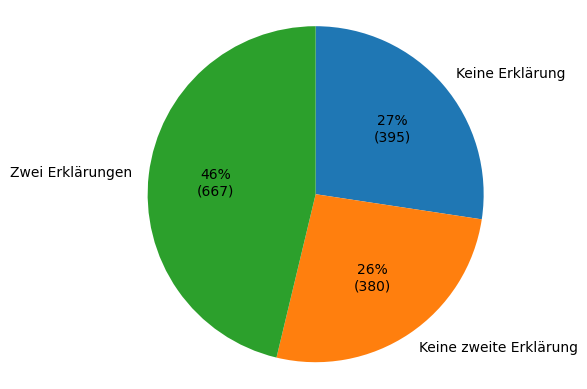

In [8]:
import matplotlib.pyplot as plt

labels = 'Keine Erklärung', 'Keine zweite Erklärung', 'Zwei Erklärungen'
values  = [a, b, c]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.0f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct=make_autopct(values), startangle=90, counterclock=False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [9]:
df.notnull().sum()

Id Strasse                1442
Strassenname              1442
Erklärung erste Zeile     1047
Erklärung zweite Zeile     667
Geo Shape                 1442
Geo Point                 1442
Erstmals erwähnt           283
Amtlich benannt           1047
Indextext                 1442
Kurztext                  1442
dtype: int64

### Wo sind die Strassen ohne Erklärungen

In [10]:
import geopandas as gpd
import contextily as cx

dfGeo = df[["Id Strasse","Strassenname","Erklärung erste Zeile","Erklärung zweite Zeile","Geo Point"]]

dfGeo.head()

,Id Strasse,Strassenname,Erklärung erste Zeile,Erklärung zweite Zeile,Geo Point
0,1267,Unterm Schellenberg,NaN,NaN,"47.57438530908011,7.647476787299508"
1,1311,Wendelinsgasse,NaN,NaN,"47.585508929842106,7.652674199435162"
2,1197,Keltenweg,NaN,NaN,"47.57320240950238,7.635561106232719"
3,1095,Artelweg,NaN,NaN,"47.578660346190595,7.662622581792329"
4,1098,Auhaldenweg,NaN,NaN,"47.58413931663541,7.66205361334022"


Die Koordinaten können im vorliegendem Format nicht von GeoPandas genutzt werden. Sie sind deshalb noch extra zu parsen.

In [11]:
dfGeo2 = dfGeo["Geo Point"].str.split(",", expand=True)
print(dfGeo2)

                       0                   1
0      47.57438530908011   7.647476787299508
1     47.585508929842106   7.652674199435162
2      47.57320240950238   7.635561106232719
3     47.578660346190595   7.662622581792329
4      47.58413931663541    7.66205361334022
...                  ...                 ...
1437   47.55470809215481  7.5715926998758345
1438   47.55463465924712   7.590782821595863
1439  47.557909106678885   7.602337377989104
1440   47.55809851612144   7.587078827934846
1441   47.53769190352618  7.6120787372563194

[1442 rows x 2 columns]


In [12]:
dfGeo2.rename(columns = {0:"lat", 1:"lon"}, inplace = True)
dfGeo = pd.concat([dfGeo, dfGeo2], axis = 1)
dfGeo.head()

,Id Strasse,Strassenname,Erklärung erste Zeile,Erklärung zweite Zeile,Geo Point,lat,lon
0,1267,Unterm Schellenberg,NaN,NaN,"47.57438530908011,7.647476787299508",47.57438530908011,7.647476787299508
1,1311,Wendelinsgasse,NaN,NaN,"47.585508929842106,7.652674199435162",47.585508929842106,7.652674199435162
2,1197,Keltenweg,NaN,NaN,"47.57320240950238,7.635561106232719",47.57320240950238,7.635561106232719
3,1095,Artelweg,NaN,NaN,"47.578660346190595,7.662622581792329",47.578660346190595,7.662622581792329
4,1098,Auhaldenweg,NaN,NaN,"47.58413931663541,7.66205361334022",47.58413931663541,7.66205361334022


Überführen der Lat/Lon Werte in eine geometry-Spalte damit der GeoDataFrame von Karten automatisch verwendet werden kann.

In [13]:
points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(dfGeo.lon, dfGeo.lat, crs="EPSG:4326"))

Transformieren der Geometry nach Webmercator, damit die Karten die Geometrien auslesen können.

In [14]:
points = points.to_crs(epsg=3857)
points.head(2)

,Id Strasse,Strassenname,Erklärung erste Zeile,Erklärung zweite Zeile,Geo Shape,Geo Point,Erstmals erwähnt,Amtlich benannt,Indextext,Kurztext,geometry
0,1267,Unterm Schellenberg,NaN,NaN,"{""coordinates"": [[[7.646100416914682, 47.57103...","47.57438530908011,7.647476787299508",NaN,NaN,SCH,Unterm Schellenberg,POINT (851313.222 6036337.556)
1,1311,Wendelinsgasse,NaN,NaN,"{""coordinates"": [[[7.652143633582508, 47.58464...","47.585508929842106,7.652674199435162",NaN,NaN,WEN,Wendelinsgasse,POINT (851891.795 6038173.233)


#### Alle Strassen
Alle Strassen im Kanton BS dargestellt als Punkt

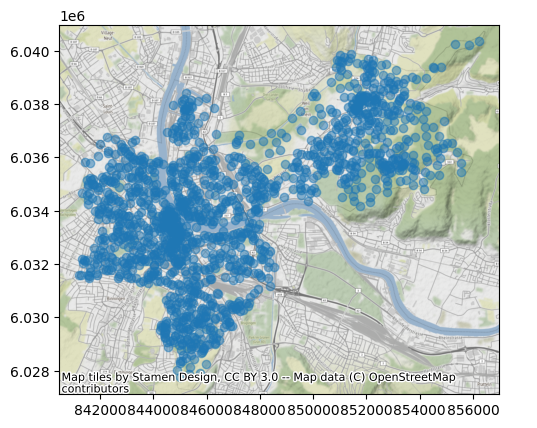

In [15]:
ax = points.plot(alpha=0.5)
cx.add_basemap(ax)
Attr = ["Id Strasse", "Strassenname", "Erklärung erste Zeile", "Erklärung zweite Zeile"]

In [16]:
# Interaktive Karte. Deaktivieren damit das Notebook auf GitHub gerendert werden kann
#points.explore(tooltip=Attr, width="70%", height="70%")

#### Keine Erklärung
Strassennamen die über keine Erklärungen aufweisen

In [17]:
dfNan = points.query("`Erklärung erste Zeile`.isnull()")
#dfNan.head(2)

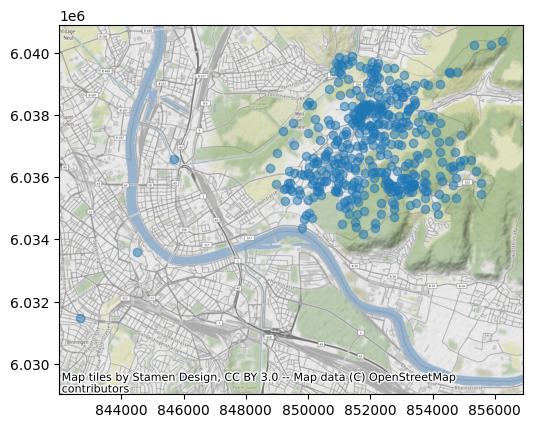

In [18]:
ax = dfNan.plot(alpha=0.5)
cx.add_basemap(ax)

In [19]:
#dfNan.explore(tooltip=Attr, width="70%", height="70%")

💡 Erkentnnis

Die allermeisten Strassen ohne eine Erklärung liegen in den Gemeinden Riehen und Bettingen

#### Keine zweite Erklärung
Strassennamen die nur über eine Erklärungen aufweisen

In [20]:
dfNan1 = points.query("`Erklärung erste Zeile`.notnull() & `Erklärung zweite Zeile`.isnull()")
#dfNan1.head(2)

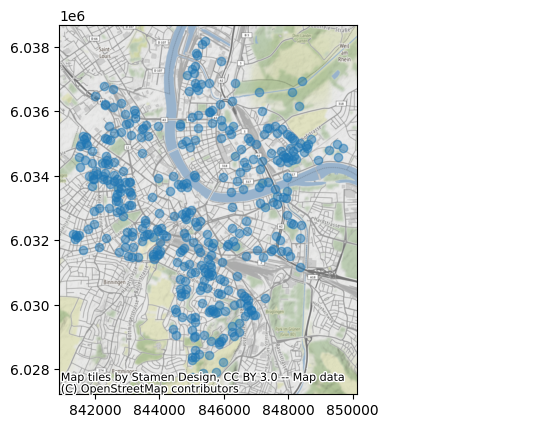

In [21]:
ax = dfNan1.plot(alpha=0.5)
cx.add_basemap(ax)

In [22]:
#dfNan1.explore(tooltip=Attr, width="70%", height="70%")

#### Zwei Erklärungen
Strassennamen die über zwei Erklärungen aufweisen

In [23]:
dfNan2 = points.query("`Erklärung erste Zeile`.notnull() & `Erklärung zweite Zeile`.notnull()")
#dfNan1.head(2)

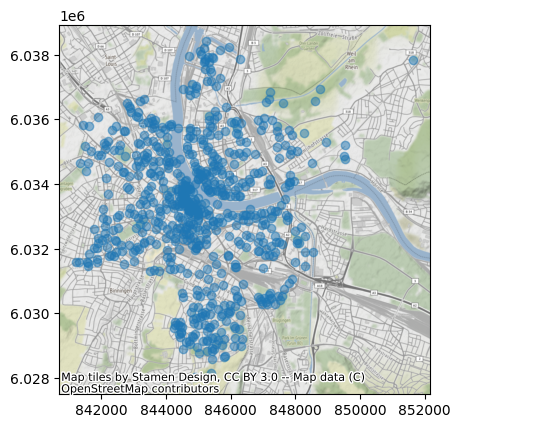

In [24]:
ax = dfNan2.plot(alpha=0.5)
cx.add_basemap(ax)

In [25]:
#dfNan2.explore(tooltip=Attr, width="70%", height="70%")